In [2]:
from utils import combine_and_aggregate_sample_PTM_in_dataframe, count_no_of_modifications, get_data_and_remove_unwanted_columns, sanitize_data, normalize_intensities_by_protein_intensity, split_data_in_samples, get_cleavage_sites_for_peptides, combine_and_aggregate_intensity
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)
df1, df2, df3, df4 = split_data_in_samples(df)
df1['#modifications1'] = df1['PTM'].apply(count_no_of_modifications)
df2['#modifications2'] = df2['PTM'].apply(count_no_of_modifications)
df3['#modifications3'] = df3['PTM'].apply(count_no_of_modifications)
df4['#modifications4'] = df4['PTM'].apply(count_no_of_modifications)

Text(0, 0.5, 'Count/size')

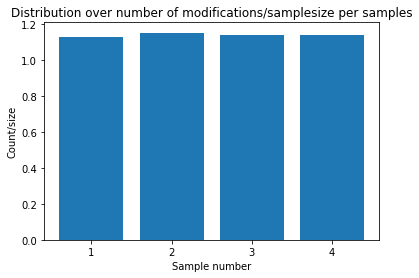

In [3]:
# plt.figure(figsize=(16,8))
samples = [1,2,3,4]

sums = [df1['#modifications1'].sum(axis = 0) / df1.shape[0], 
        df2['#modifications2'].sum(axis = 0) / df2.shape[0], 
        df3['#modifications3'].sum(axis = 0) / df3.shape[0], 
        df4['#modifications4'].sum(axis = 0) / df4.shape[0]]

plt.bar(samples, sums)
plt.xticks(samples)
plt.title("Distribution over number of modifications/samplesize per samples")
plt.xlabel('Sample number')
plt.ylabel('Count/size')

#Shit plot

ValueError: shape mismatch: objects cannot be broadcast to a single shape

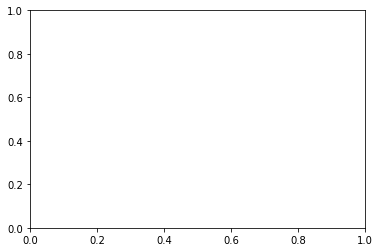

In [4]:
x = np.arange(4)
labels = ['sample1', 'sample2', 'sample3', 'sample4']
width = 0.125

fig, ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, df1['#modifications1'].value_counts(sort=False), width, label="sample1")
rects2 = ax.bar(x-width/2, df2['#modifications2'].value_counts(sort=False), width, label="sample2")
rects3 = ax.bar(x+width/2, df3['#modifications3'].value_counts(sort=False), width, label="sample3")
rects4 = ax.bar(x+width*3/2, df4['#modifications4'].value_counts(sort=False), width, label="sample4")

ax.set_ylabel('count')
ax.set_title("count of peptides by number of modifications and samples")
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.legend()

fig.tight_layout()

plt.show()

#More shit plots

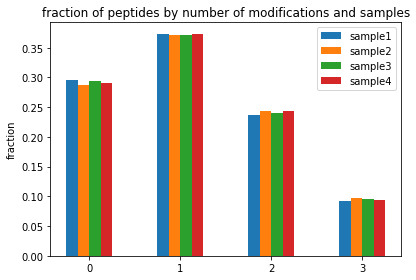

In [ ]:
x = np.arange(4)
labels = ['sample1', 'sample2', 'sample3', 'sample4']
width = 0.125

fig, ax = plt.subplots()
rects1 = ax.bar(x-width*3/2, df1['#modifications1'].value_counts(sort=False, normalize=True), width, label="sample1")
rects2 = ax.bar(x-width/2, df2['#modifications2'].value_counts(sort=False, normalize=True), width, label="sample2")
rects3 = ax.bar(x+width/2, df3['#modifications3'].value_counts(sort=False, normalize=True), width, label="sample3")
rects4 = ax.bar(x+width*3/2, df4['#modifications4'].value_counts(sort=False, normalize=True), width, label="sample4")

ax.set_ylabel('fraction')
ax.set_title("fraction of peptides by number of modifications and samples")
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.legend()

fig.tight_layout()

plt.show()

#Even More shit plots

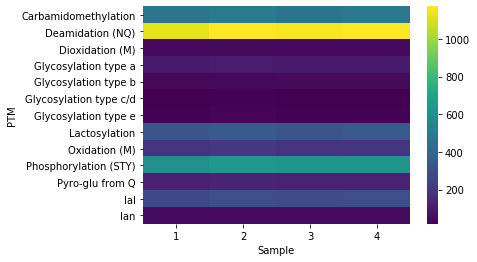

In [ ]:
combined = combine_and_aggregate_sample_PTM_in_dataframe(df1,df2,df3,df4)
combined = combined.sort_values('Sample')
data = pd.pivot_table(data = combined, index = 'PTM', values = '#PTM', columns='Sample')

sns.heatmap(data, cmap='viridis')

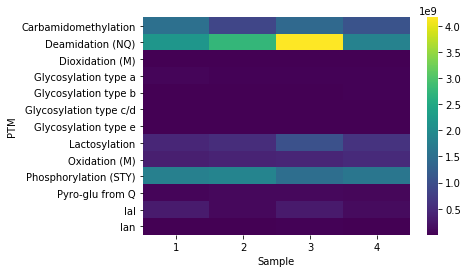

In [ ]:
df1, df2, df3, df4 = split_data_in_samples(df)
combined = combine_and_aggregate_intensity(df1, df2, df3, df4).sort_values(by=['PTM'])

data = pd.pivot_table(data = combined, index = 'PTM', values = 'Intensity', columns='Sample')
sns.heatmap(data, cmap='viridis')

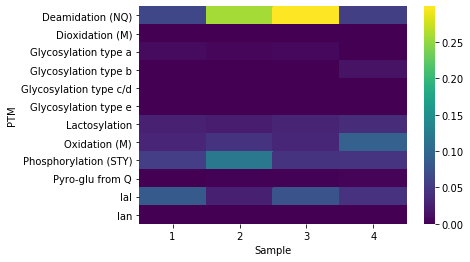

In [ ]:
df1_norm, df2_norm, df3_norm, df4_norm = split_data_in_samples(dfs[0])
combined = combine_and_aggregate_intensity(df1_norm,df2_norm,df3_norm,df4_norm).sort_values(by=['PTM'])

data = pd.pivot_table(data = combined, index = 'PTM', values = 'Intensity', columns='Sample')
sns.heatmap(data, cmap='viridis')

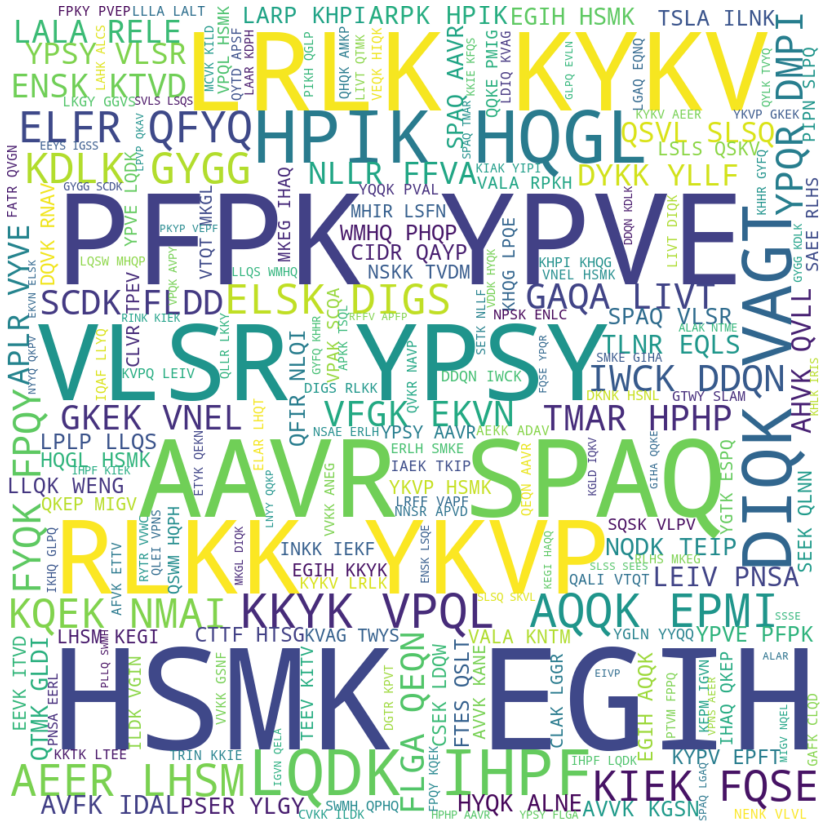

In [ ]:
df, start, end = get_cleavage_sites_for_peptides(df)
words_string = " ".join(map(str, start))

wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color='white').generate(words_string)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

                       PTM   Intensity  Sample
0         Deamidation (NQ)   98.563288       1
1          Dioxidation (M)    5.833580       1
2     Glycosylation type a   10.842132       1
3     Glycosylation type b    6.666819       1
4   Glycosylation type c/d    3.333333       1
5     Glycosylation type e    3.000000       1
6            Lactosylation   21.194519       1
7            Oxidation (M)   23.031524       1
8    Phosphorylation (STY)   39.221200       1
9          Pyro-glu from Q   13.001137       1
10                     lal   26.750741       1
11                     lan    0.333333       1
0         Deamidation (NQ)   89.425945       2
1          Dioxidation (M)    8.501077       2
2     Glycosylation type a   12.005177       2
3     Glycosylation type b    8.500001       2
4   Glycosylation type c/d    2.833333       2
5     Glycosylation type e    3.000025       2
6            Lactosylation   19.189989       2
7            Oxidation (M)   20.877331       2
8    Phosphor